# 부동산 114 데이터 크롤링(강남,노원)

In [9]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup #HTML/SML 파일을 파싱하기 위한 파이썬 라이브러리
from time import sleep
from selenium.webdriver.common.keys import Keys
import re
import pymysql
count = 820
data = []
def insert_sql(data):
    conn = pymysql.connect(host='localhost',
            user='root',
            password='tjdgjs789',
            db='project',
            charset='utf8')
    try:
        with conn.cursor() as cursor:
            for item in data:
                '''
                if item['주소'] == '삼성동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,1,0,0,0,0,0,0,0,0,0)
                    """                
                elif item['주소'] == '일원동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,1,0,0,0,0,0,0,0,0)
                    """
                elif item['주소'] == '대치동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,1,0,0,0,0,0,0,0)
                    """
                elif item['주소'] == '역삼동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,1,0,0,0,0,0,0)
                    """
                elif item['주소'] == '청담동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,1,0,0,0,0,0)
                    """
                elif item['주소'] == '수서동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,1,0,0,0,0)
                    """
                elif item['주소'] == '논현동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,1,0,0,0)
                    """
                elif item['주소'] == '도곡동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,1,0,0)
                    """
                elif item['주소'] == '압구정동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,1,0)
                    """
                elif item['주소'] == '세곡동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,1)
                    """
                ''' # 강남 sql
                '''
                if item['주소'] == '공릉동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,gongreung)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """                
                elif item['주소'] == '하계동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,hagye)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """
                elif item['주소'] == '상계동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,sanggye)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """
                elif item['주소'] == '월계동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,wolgye)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """
                elif item['주소'] == '중계동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,junggye)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """
                ''' # 노원 sql
                if item['주소'] == '가산동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,gasan)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """                
                elif item['주소'] == '독산동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,doksan)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """
                elif item['주소'] == '시흥동':
                    sql =  """
                    insert into apartment2(num,larea,barea,age,dist,units,burger,room,price,floor
                    ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok,siheung)
                    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,0,0,0,0,0,0,0,0,0,0,1)
                    """
                print(sql)
                cursor.execute(sql,(int(item['count']),int(item['공급면적']) ,int(item['전용면적']),int(item['연식']),
                                int(item['거리']),int(item['주차']),0.9,int(item['방수']),int(item['가격']),int(item['층수'])))
                conn.commit()
    finally:
        conn.close()
def select_gu(index):
    sleep(1)
    driver.find_element_by_xpath('//*[@id="addressTitle"]/a[1]').send_keys(Keys.ENTER)
    sleep(2)
    driver.find_element_by_xpath('//*[@id="msrch_wrap_selectarea_Addr"]/li[1]').click() #서울시 클릭
    sleep(2)
    #gu_list = driver.find_element_by_xpath('//*[@id="msrch_wrap_selectarea_Addr"]')
    #gu = gu_list.find_elements_by_tag_name("li")
    driver.find_element_by_xpath('//*[@id="msrch_wrap_selectarea_Addr"]/li['+str(index+1)+']').click() #~~구 선택
    sleep(2)
    driver.find_element_by_xpath('//*[@id="div_selectAddrTotal"]/a').send_keys(Keys.ENTER)# ~~구 전체 클릭
    sleep(2)
def select_numlist(index):
    try:
        driver.find_element_by_xpath('//*[@id="body_layout"]/div/div[5]/div[5]/a['+str(index)+']').send_keys(Keys.ENTER)
        sleep(3)
    except Exception as ex:
        print(ex)
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        sleep(1)
        driver.find_element_by_xpath('//*[@id="body_layout"]/div/div[5]/div[5]/a['+str(index)+']').send_keys(Keys.ENTER)

def select_apt(index):
    try:
        driver.find_element_by_xpath('//*[@id="body_layout"]/div/div[5]/ul[3]/li['+str(index)+']/a').send_keys(Keys.ENTER)
        sleep(1)
        driver.switch_to.window(driver.window_handles[-1])
    except Exception as ex:
        print(ex)
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        sleep(1)
        driver.find_element_by_xpath('//*[@id="body_layout"]/div/div[5]/ul[3]/li['+str(index)+']/a').send_keys(Keys.ENTER)

def collect_detail():
    #beautiful soup 사용하자 제발..
    sleep(2)
    req = driver.page_source
    soup = BeautifulSoup(req,'html.parser')
    table = soup.find('ul',class_='mamul_info_area if_tyep1')
    larea = soup.find('li',class_='if_area1').find_all('span',{'style' : 'display:none'})[0].text
    barea = soup.find('li',class_='if_area1').find_all('span',{'style' : 'display:none'})[1].text
    price = soup.find('li',class_='if_area2').find('em',class_='price1').text
    floor = soup.find('li',class_='if_area3').find('dd').text
    room = soup.find('li',class_='if_area4').find('dd').text
    table = soup.find('div',id='divCompexTab')
    #print(table)
    address = table.find('div',class_='tbl_type_1row').find('span',id ='spnAddr1').text
    rows = table.find('div',class_='tbl_type_2row').find_all('li')
    parking=""
    year = ""
    #print(rows)
    for item in rows:
        if item.find('span',class_='spninfo') == None:
            continue
        if item.find('span',class_='spninfo').text == '주차대수':
            parking = item.find('span',class_='spndetail').text
        elif item.find('span',class_='spninfo').text == '입주일':
            year = item.find('span',class_='spndetail').text
    table = soup.find('div',id='divSubwayList')
    if table.find('ul') != None:
        if table.find('ul').find('li') != None:
            subway = table.find('ul').find('li').text
    else:
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        sleep(3)
        return
    print(larea + barea + price + floor + room + address  + address +parking + year + subway)
    deal_string(count,floor,larea,barea,room,year,subway,parking,address,price)
    driver.close()
    driver.switch_to.window(driver.window_handles[0])
    sleep(2)
def deal_string(num,floor,larea,barea,room,year,subway,parking,address,price):#데이터 전처리
    #하나라도 데이터가 없으면 return
    global data
    global count
    try:
        con_floor = floor.split('/')[0].replace('층','').replace(' ','')
        if con_floor == '저':
            con_floor = 3
        elif con_floor == '중':
            con_floor = 10
        elif con_floor == '고':
            con_floor = 20
        con_larea = re.findall("\d+",larea)[0]
        con_barea = re.findall("\d+",barea)[0]
        con_room = re.findall("\d+",room.split('/')[0])[0]
        con_year = 2019 - int(year.split('.')[0])
        con_subway = re.findall("\d+",subway.split('(')[1])[0]
        con_parking = re.findall("\d+",parking.split('(')[0])[0]
        con_price = price.replace(',','').replace('만원','').replace(' ','')
        '''if address.find("삼성동")>=0:
            con_address = "삼성동"
        elif address.find("일원동")>=0:
            con_address = "일원동"
        elif address.find("대치동")>=0:
            con_address = "대치동"
        elif address.find("역삼동")>=0:
            con_address = "역삼동"
        elif address.find("청담동")>=0:
            con_address = "청담동"
        elif address.find("수서동")>=0:
            con_address = "수서동"
        elif address.find("논현동")>=0:
            con_address = "논현동"
        elif address.find("도곡동")>=0:
            con_address = "도곡동"
        elif address.find("압구정동")>=0:
            con_address = "압구정동"
        elif address.find("세곡동")>=0:
            con_address = "세곡동"
        else:
            print("그 외 주소")
            return'''
        '''
        if address.find('공릉동')>=0:
            con_address = '공릉동'
        elif address.find("상계동")>=0:
            con_address = '상계동'
        elif address.find("중계동")>=0:
            con_address = '중계동'
        elif address.find("월계동")>=0:
            con_address = '월계동'
        elif address.find("하계동")>=0:
            con_address = '하계동'
            '''
        if address.find('가산동')>=0:
            con_address = '가산동'
        elif address.find("독산동")>=0:
            con_address = '독산동'
        elif address.find("시흥동")>=0:
            con_address = '시흥동'
        print(int(con_price))
        print(int(con_floor))
        print(int(con_larea))
        print(int(con_barea))
        print(int(con_room))
        print(int(con_year))
        print(int(con_subway))
        print(int(con_parking))
        print(con_address)
        data.append({'count':count,'층':int(con_floor),'공급면적':float(con_larea),'전용면적':float(con_barea),"방수":int(con_room),
                "연식":int(con_year),"거리":int(con_subway),"주차":int(con_parking) ,"가격":int(con_price),
                "주소":con_address,"층수":int(con_floor)})
        if len(data)>=10:
            insert_sql(data)
            data.clear()
        count = count + 1
        
    except Exception as ex:
        print(ex)
        
            
        
    
    
    
data = [] #부동산 114 데이터
path = "C:\\Users\\rlat3\\chromedriver.exe"
driver = webdriver.Chrome(path)
#암묵적으로 웹 자원 로드를 위해 3초 기다려줌
driver.implicitly_wait(3)
#부동산 114 점속

driver.get("https://www.r114.com/?_c=memul&_m=p10")
sleep(2)
#매매가 선택
driver.find_element_by_xpath('//*[@id="search_layout"]/div/div/div/div[4]/a').click()
sleep(1)
driver.find_element_by_xpath('//*[@id="MemulStyle"]/li[2]/label/span').click()
sleep(1)
select_gu(7)
index = 1
lap = 0
while True:
    try:
        sleep(1.5)
        select_numlist(index)
        for i in range(30):
            try:
                sleep(1)
                select_apt(i+1)
                sleep(1)
                collect_detail()
            except Exception as ex:
                break
        index = index+1
        if index == 11 and lap == 0:
            index = 2
            lap = lap +1
        elif index == 12 and lap>0:
            index = 2
            sleep(1)
    except Exception as ex:
        print(ex)
        break


31평24평60,000 만원2층 / 총 19층3개 / 2개 서울특별시 금천구 시흥동 1015 도로명주소서울특별시 금천구 시흥동 1015 도로명주소총253대 (가구당 1.1대)2004.02.29 1호선 금천구청 1출구 도보 11 분  (도로기준 약 691m)
60000
2
31
24
3
15
691
253
시흥동


KeyboardInterrupt: 

# Scikitlearn을 활용한 학습

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

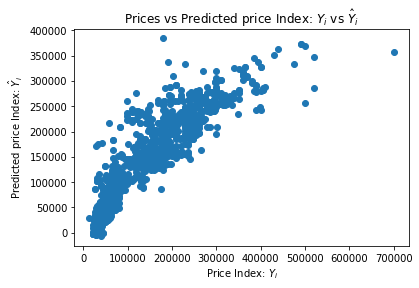

In [30]:
import matplotlib.pyplot as plt


linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))


plt.scatter(y, prediction)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [26]:
from sklearn.metrics import r2_score

print("Package's Rsuqared : " + (str)(r2_score(y, prediction)))


Package's Rsuqared : 0.7319837660936812


In [52]:
conn = pymysql.connect(host='localhost',
            user='root',
            password='tjdgjs789',
            db='project',
            charset='utf8')
try:
    with conn.cursor() as cursor:
        for item in result:
                sql = '''
                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                '''
                print(sql)
                cursor.execute(sql,(item['num'],item['larea'],item['barea'],item['age'],item['dist'],item['units'],
                     item['burger'],item['room'],item['price'],item['samsung'],item['ilwon'],item['daechi'],item['yeoksam'],
                     item['cheongdam'],item['suseo'],item['nonhyeon'],item['dogok'],item['apgujeong'],item['segok'],
                     item['sanggye'],item['wolgye'],item['junggye'],item['hagye'],item['gongreung'],item['floor']))
                conn.commit()
finally:
    conn.close()


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr

                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,ju


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr

                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,ju


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr

                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,ju


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr

                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,ju


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr

                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,ju


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr

                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,ju


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr

                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,ju


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr


                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongreung,floor)
                 values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s
                 ,%s,%s,%s,%s);
                

                insert into apartment3 (num,larea,barea,age,dist,units,burger,room,price
                ,samsung,ilwon,daechi,yeoksam,cheongdam,suseo,nonhyeon,dogok,apgujeong,segok
                ,sanggye,wolgye,junggye,hagye,gongr